<div class="alert alert-block alert-info">
This notebook is to find popular tracks/albums info of Joey Yung. <br>
Note that the data exclude Singles and EPs.
</div>

## Import libraries and set up

In [2]:
df_tmp = pd.read_parquet('/Users/chezhu/Documents/my_github/spotify-my-favorite-artists-public/data/joey_yung_album_tracks_asof_20200510.parquet')

In [5]:
df_tmp[df_tmp.name.str.contains('翅膀')]

,album,track_number,name,uri,available_markets,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,time_signature,album_uris,album_release_date,album_release_date_precision,album_total_trakcs
68,一百個我 國語新曲+精選,3,揮著翅膀的女孩,spotify:track:3ckCH7YwSzzB88FAnPbaQ2,"[AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, CO, C...",186042,0.917,0.660,0.237,0.0,0.096,-10.988,0.0338,163.887,0.375,20,10,1,4,spotify:album:2IRcqVOTFzU5Mbn7grINjB,2016-12-16,day,31
768,我的驕傲,21,揮著翅膀的女孩 - 國,spotify:track:3tPhn7ocw1yDxOSBIiDHF6,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",185600,0.956,0.646,0.267,0.0,0.102,-8.519,0.0307,163.986,0.434,29,10,1,4,spotify:album:47QR46oFoA68uOfGumiDWR,2003-03-25,day,22
770,獨照,1,揮著翅膀的女孩,spotify:track:4eTMp1hWEn1nDDE84M0qhk,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",185600,0.956,0.646,0.267,0.0,0.102,-8.519,0.0307,163.986,0.434,40,10,1,4,spotify:album:3dDAaGfwzLRxjAHM4iyOcW,2003,year,11


In [1]:
import pandas as pd
import numpy as np
import sys

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

In [3]:
my_color = {
    'light_blue': '#7FB3D5'
}

## Load master data of Joey Yung's tracks
See notebook "pull_tracks_wrt_artist.ipynb" for details.

In [4]:
df_all = pd.read_parquet('data/joey_yung_album_tracks_asof_20200510.parquet')

In [5]:
# # de-dup by "name" and keep the top popular one
# df_dedup = df_all.sort_values(by='popularity', ascending=False).drop_duplicates('name').sort_index()
# df_all.shape, df_dedup.shape

In [6]:
# Let's focus on analyzing the data before de-dup
df = df_all.copy()

In [7]:
df.sample(2)

,album,track_number,name,uri,available_markets,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,time_signature,album_uris,album_release_date,album_release_date_precision,album_total_trakcs
371,Perfect 10 Live 2009,8,可歌可泣,spotify:track:4J0oc6xNCVVFkHqRkUEmFc,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",256013,0.688,0.414,0.566,0.0,0.845,-9.58,0.2120,139.334,0.338,9,7,1,4,spotify:album:6KorQI0ilNZwYdSgnamxlh,2010-02-09,day,28
429,甜蜜蜜2007鄧麗君金曲交響演唱會,9,漫步人生路,spotify:track:1jEerabXqNoohhndlkkXhD,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",161053,0.202,0.531,0.681,0.0,0.887,-10.40,0.0638,111.518,0.646,3,9,0,4,spotify:album:06LTTofjpt7WdJCldbfrGj,2008-09-06,day,10


## Exploratory data analysis

### Albums: Number of albums released by year

🤔 On average, Joey released 1 or 2 albums every year. She had some EPs/Singles released in recent years but not captured here.

In [8]:
df['album_release_year'] = df['album_release_date'].apply(lambda x: int(x[:4]))

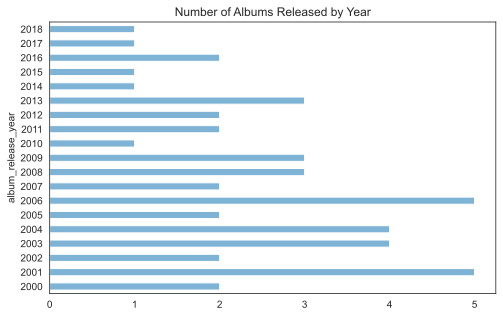

In [9]:
df.groupby('album_release_year')['album'].nunique().plot(kind='barh', color=my_color['light_blue'])
plt.title('Number of Albums Released by Year');

🤔 We are more likely to expect a new album coming out between June and January than between February and May based on historical data.

In [10]:
df_albums = df[df.album_release_date_precision=='day'][['album', 'album_release_date']].drop_duplicates()
df_albums['album_release_month'] = pd.to_datetime(df_albums['album_release_date'], format='%Y-%m-%d').dt.month

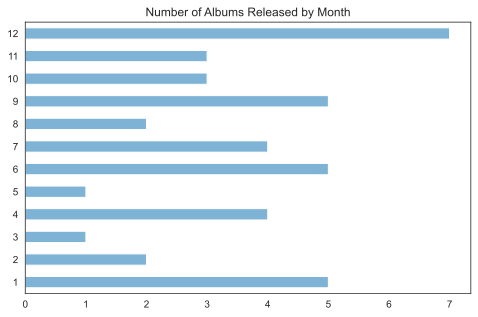

In [11]:
df_albums.album_release_month.value_counts().sort_index().plot(kind='barh', color=my_color['light_blue'])
plt.title('Number of Albums Released by Month');

### Albums: Popularity

The popularity is calculated from the popularity of the album’s individual tracks.<br>
[According to Sportify](https://developer.spotify.com/documentation/web-api/reference-beta/#objects-index), the `popularity` of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
---

In [12]:
df['album_popularity'] = df.groupby('album').popularity.transform('mean') # Add album popularity

In [13]:
# Top albums are calculated based on the average tracks' popularity in that album
top_albums = (df[['album', 'album_release_year', 'album_popularity']]
              .drop_duplicates()
              .sort_values(by='album_popularity', ascending=False)
              .head(10)
             )
top_albums

,album,album_release_year,album_popularity
222,Hopelessly Romantic Collection,2013,33.057143
481,喜歡祖兒4 (新曲 + 精選),2007,24.090909
94,Joey Yung X Hacken Lee Concert 2015 (Live),2015,19.981818
10,Joey • My Secret • Live,2017,19.487805
0,答案之書,2018,18.300000
149,1314 容祖兒演唱會,2014,17.076923
51,一百個我 國語新曲+精選,2016,15.419355
748,我的驕傲,2003,15.045455
257,小日子,2013,14.769231
188,All Delicious Collection,2013,14.147059


In [6]:
# TODO: for album_release_date precision as year, the output is not looking right. 挥着翅膀的女孩 独照，as an example
# Top popular tracks in the top popular albums
top_tracks_in_top_albums = (df[df.album.isin(top_albums.album)]
                            .sort_values(by=['album', 'popularity'], ascending=False)
                            .groupby('album').head(5)[['album', 'name', 'popularity', 'album_popularity', 'album_release_date']]
                            .sort_values('album_popularity', ascending=False)
                           )
top_tracks_in_top_albums[['name', 'album', 'album_release_date']]

NameError: name 'df' is not defined

### Tracks: Popularity

🤔 Based on the description of **popularity**, songs that played a lot now will have a higher popularity than songs that were played a lot in the past. Here, however, we can see most popular songs are released in year 2013 or even earlier. Fans seems to be more attracted by relatively older songs.

In [15]:
df.sort_values(by='popularity', ascending=False).head(50)[['name', 'album', 'album_release_date', 'popularity']].set_index('album')

,name,album_release_date,popularity
album,,,
我的驕傲,心淡,2003-03-25,54
Hopelessly Romantic Collection,連續劇,2013-12-03,50
Hopelessly Romantic Collection,續集 - TVB電視劇「On Call 36小時II」主題曲,2013-12-03,49
一百個我 國語新曲+精選,這就是愛嗎?,2016-12-16,48
喜歡祖兒4 (新曲 + 精選),16 號愛人,2007-01-14,47
Hopelessly Romantic Collection,痛愛,2013-12-03,46
喜歡祖兒4 (新曲 + 精選),爭氣,2007-01-14,43
喜歡祖兒4 (新曲 + 精選),痛愛,2007-01-14,42
我的驕傲,我的驕傲,2003-03-25,42
